# **Customer Segmentation with K-mean Model**

***Context***

 Customer segmentation is a strategic process that involves categorizing a large customer base into smaller, more cohesive groups characterized by shared attributes or behaviors. This approach empowers businesses to gain deeper insights into their customers' individual requirements, preferences, and actions. Consequently, companies can customize their marketing tactics and product offerings to cater to the distinct demands of each segment. Customer segmentation plays a pivotal role in recognizing high-value customer segments, enabling precise targeting, and facilitating the delivery of personalized experiences. This, in turn, enhances overall customer satisfaction and fosters greater customer loyalty.

 Objective: Complement and add value to the project in: https://www.kaggle.com/datasets/bhuviranga/customer-segmentation?resource=download

 Prepared by: Jhon Ramírez

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [175]:
#Loading the dataset
df = pd.read_csv("Customer Segmentation.csv")
df

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,460394,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D
1,1,461798,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A
2,2,464976,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D
3,3,462104,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D
4,4,464829,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D
...,...,...,...,...,...,...,...,...,...,...,...,...
10690,10690,462861,Female,No,30,Yes,Healthcare,8.0,Low,1.0,Cat_6,D
10691,10691,464409,Female,Yes,81,Yes,Lawyer,0.0,Average,2.0,Cat_6,A
10692,10692,465861,Female,No,40,Yes,Entertainment,14.0,Low,1.0,Cat_6,A
10693,10693,465056,Male,Yes,87,Yes,Lawyer,1.0,High,2.0,Cat_6,A


In [176]:
#Dropping redundant columns
df.drop(columns = ['Unnamed: 0','ID'], inplace = True)

In [177]:
#Checking for null values
df.isnull().sum()

Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [178]:
#Getting the shape of the data
df.shape

(10695, 10)

## Data Exploration

***Relevant Observations***

As demonstrated in the following visualizations, the initial segmentation exhibits a nearly uniform distribution. However, upon examining the distribution across other mentioned fields, several observations can be made:

* Fields such as Age, Work_Experience, and Family_Size appear to lack discernible relationships or patterns based on the initial segmentation identified within the dataset.

* A significant portion of customers is categorized as Cat_6 in the Var_1 field. This prevalence could potentially introduce a misleading bias into predictive models. Therefore, a thorough review, including sensitivity analysis, is warranted in this regard.

These insights highlight the need for careful consideration when analyzing and modeling the dataset to ensure the accuracy and reliability of results.

Text(0, 0.5, 'Counts')

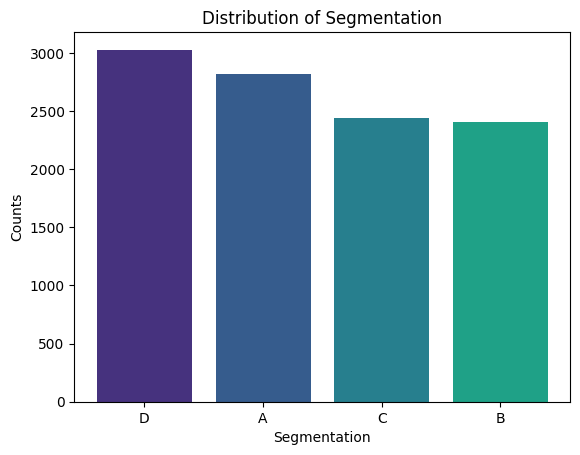

In [179]:
sns.set_palette('viridis')

# Visualizing segmentation
plt.bar(df['Segmentation'].value_counts().index, df['Segmentation'].value_counts().values, color=sns.color_palette())
plt.title('Distribution of Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Counts')

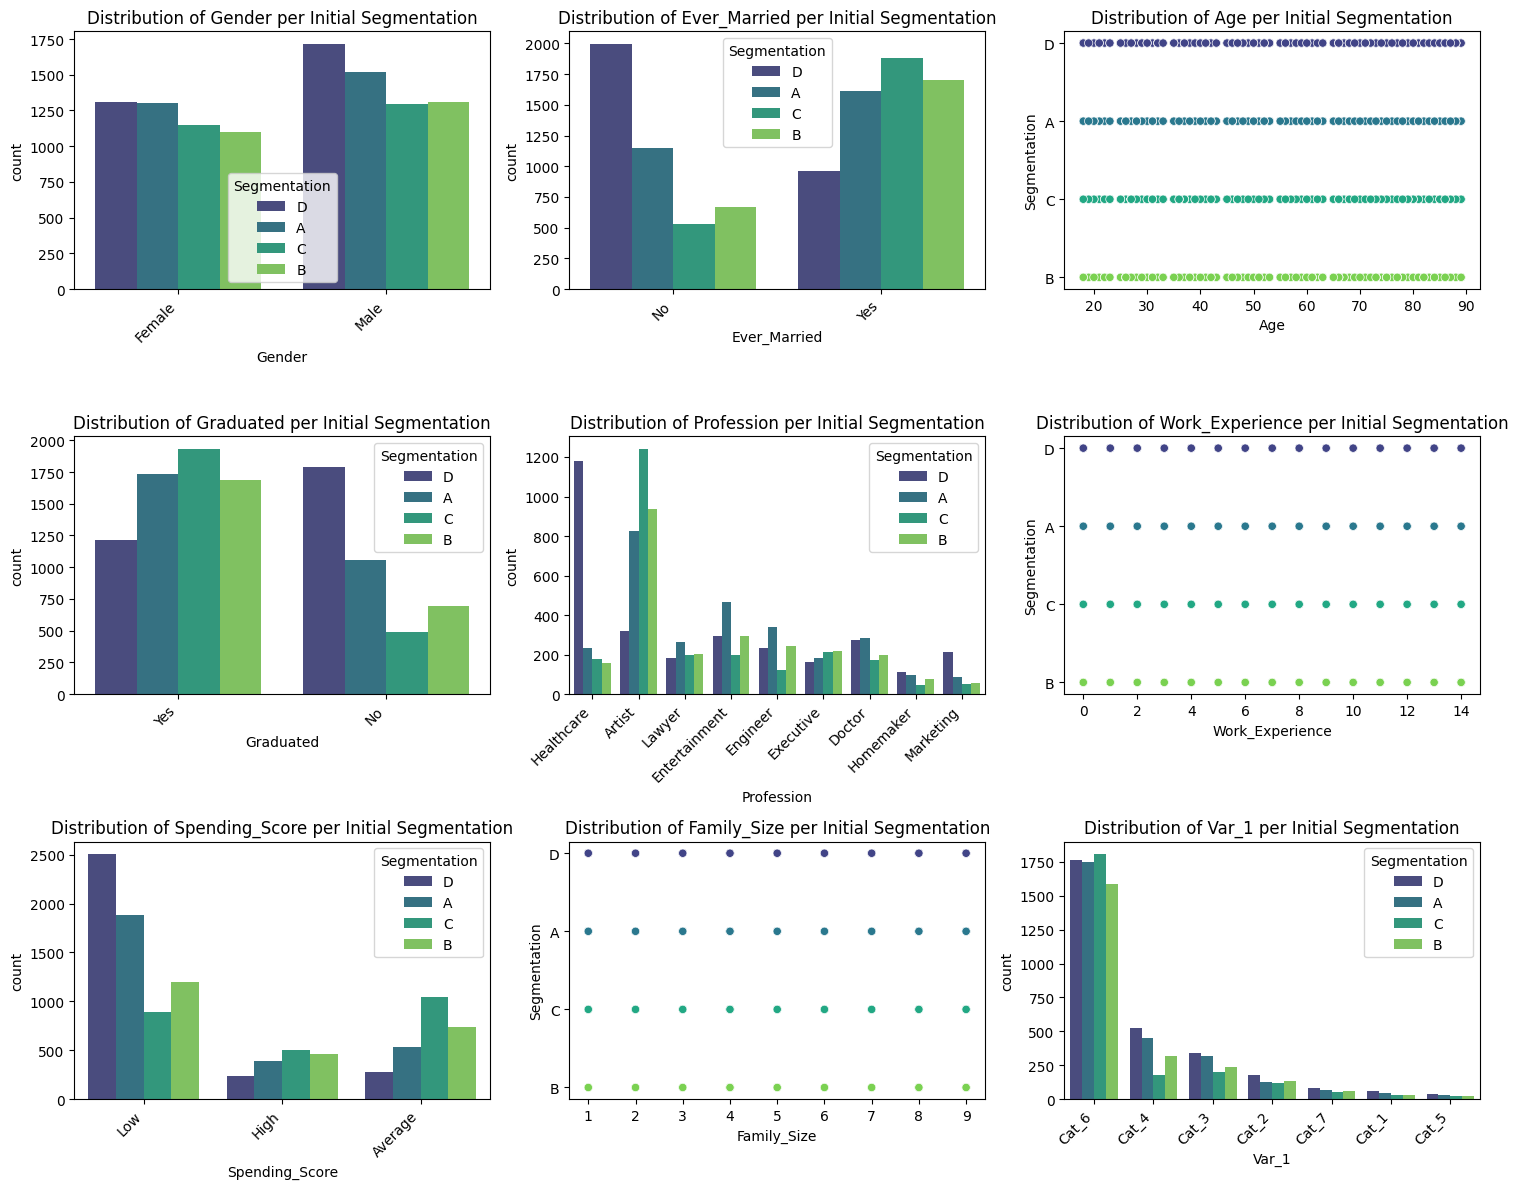

In [180]:
# Lista de campos a visualizar
fields_to_plot = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']

# Configurar el diseño de subtramas
num_plots = len(fields_to_plot)
num_rows = 3  # Cambiar según la cantidad de subtramas deseadas por fila
num_cols = (num_plots - 1) // num_rows + 1

# Crear la figura y las subtramas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

# Iterar a través de los campos y crear los gráficos correspondientes
for i, field in enumerate(fields_to_plot):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    if df[field].dtype == 'object':
        # Gráfico de barras para campos categóricos
        sns.countplot(data=df, x=field, hue='Segmentation', ax=ax, palette='viridis')
        ax.set_title(f'Distribution of {field} per Initial Segmentation')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Inclinar x-labels
    else:
        # Gráfico de dispersión para campos numéricos
        sns.scatterplot(data=df, x=field, y='Segmentation', hue='Segmentation', ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribution of {field} per Initial Segmentation')
        ax.set_ylabel('Segmentation')
        ax.set_xlabel(field)

# Eliminar subtramas vacías si es necesario
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

# Ajustar el diseño de las subtramas
plt.tight_layout()
plt.show()

## Data Cleaning

In [181]:
#Filling null-values using mode
df['Work_Experience'] = df['Work_Experience'].fillna(2)
df['Family_Size'] = df['Family_Size'].fillna(1)
#Dropping where required
df.dropna(inplace = True)
#Verifying if all null values have been removed
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [182]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D
1,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A
2,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D
3,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D
4,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D


***Label Encoding*** is a process used in data preparation for machine learning. It is applied to categorical variables (variables that take on a discrete set of categories) to convert them into numerical values, enabling machine learning algorithms to work with them effectively. In this code snippet, we use the scikit-learn library to perform label encoding on a dataset.

In [183]:
#Label Encoding categorical values
from sklearn.preprocessing import LabelEncoder

# Crear un encoder
encoder = LabelEncoder()
df_encode = df.copy()

# Definir el mapeo de categorías a valores numéricos
category_mapping = {
    'Low': 0,
    'Average': 1,
    'High': 2
}

# Aplicar el mapeo al encoder
encoder.fit(list(category_mapping.keys()))

# Aplicar el encoder a la columna 'Spending_Score'
df_encode['Spending_Score'] = df_encode['Spending_Score'].map(category_mapping)

# Verificar los resultados
df_encode

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,No,32,Yes,Healthcare,9.0,0,3.0,Cat_6,D
1,Female,No,56,Yes,Artist,0.0,0,1.0,Cat_6,A
2,Male,Yes,75,No,Lawyer,1.0,0,1.0,Cat_4,D
3,Male,Yes,39,No,Entertainment,9.0,0,2.0,Cat_3,D
4,Male,No,22,No,Healthcare,9.0,0,5.0,Cat_4,D
...,...,...,...,...,...,...,...,...,...,...
10690,Female,No,30,Yes,Healthcare,8.0,0,1.0,Cat_6,D
10691,Female,Yes,81,Yes,Lawyer,0.0,1,2.0,Cat_6,A
10692,Female,No,40,Yes,Entertainment,14.0,0,1.0,Cat_6,A
10693,Male,Yes,87,Yes,Lawyer,1.0,2,2.0,Cat_6,A


In [184]:
# Crear variables ficticias para las columnas especificadas
columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']
df_adj = pd.get_dummies(df_encode, columns=columns_to_encode,drop_first=True)

# Eliminar la columna 'Segmentation'
df_adj = df_adj.drop(columns=['Segmentation'])

# Verificar el DataFrame resultante
df_adj

,Age,Work_Experience,Spending_Score,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,32,9.0,0,3.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,56,0.0,0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,75,1.0,0,1.0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,39,9.0,0,2.0,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,22,9.0,0,5.0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,30,8.0,0,1.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10691,81,0.0,1,2.0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
10692,40,14.0,0,1.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10693,87,1.0,2,2.0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


***Standard Scaling*** is a process used in data preparation for machine learning with the aim of standardizing numerical variables so that they have a mean of zero and a standard deviation of one. This is beneficial for many machine learning algorithms as it helps variables have a similar scale and dispersion, making it easier for comparison and distance calculations.

In [185]:
#Scaling the variables
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas a escalar
columns_to_scale = ['Age','Family_Size','Work_Experience']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_scaled = df_adj.copy()

# Inicializar el StandardScaler
scaler = StandardScaler()

# Escalar las columnas seleccionadas
df_scaled[columns_to_scale] = scaler.fit_transform(df_adj[columns_to_scale])

df_scaled.head()

,Age,Work_Experience,Spending_Score,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,-0.688403,1.997803,0,0.148076,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0.744798,-0.791432,0,-1.145135,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.879415,-0.481517,0,-1.145135,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,-0.270386,1.997803,0,-0.498530,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,-1.285570,1.997803,0,1.441286,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## K-mean Model

### First Approach


***Elbow Curve***

The Elbow Curve is a visual tool used in cluster analysis to help identify the optimal number of clusters in a dataset. The goal is to find a balance between the number of clusters used and the variability within the clusters. The Elbow Curve is commonly used with the K-Means algorithm but can be applied to other clustering algorithms as well.

According to the chart, it appears that a K-means model with either 3 or 4 clusters is a suitable choice. I have opted for 4 clusters as it demonstrates a more pronounced change in the direction of the curve.

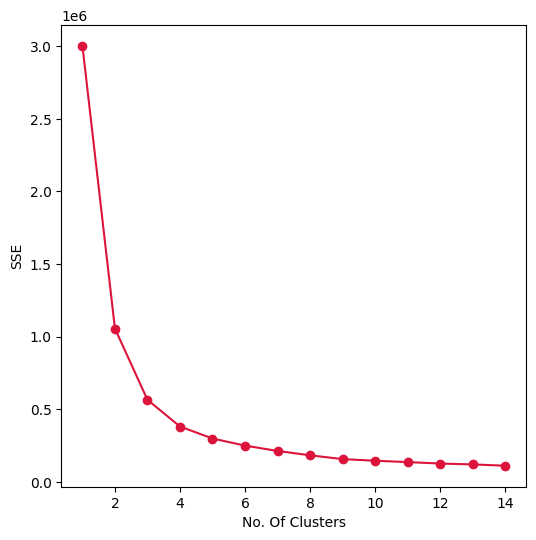

In [188]:
import warnings
warnings.filterwarnings('ignore')  # Add this line to suppress warnings

#Plotting the Elbow Curve
from sklearn.cluster import KMeans
SSE = []
for cluster in range(1, 15):
    model = KMeans(n_clusters=cluster, init='k-means++').fit(df_adj)
    SSE.append(model.inertia_)

frame = pd.DataFrame({'Cluster': range(1, 15), 'SSE': SSE})
plt.figure(figsize=(6, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', c='crimson')
plt.xlabel('No. Of Clusters')
plt.ylabel('SSE')

plt.show()

In [189]:
# K-mean Model first Approach
model = KMeans(n_clusters=4).fit(df_adj)
labels = model.labels_

Text(0, 0.5, 'Counts')

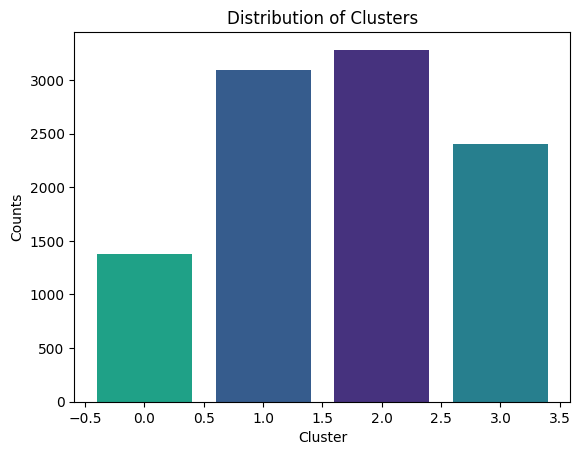

In [190]:
#Getting the value counts for the different clusters
pred = model.predict(df_adj)
df_adj['Cluster'] = pred
plt.bar(df_adj['Cluster'].value_counts().index, df_adj['Cluster'].value_counts().values, color=sns.color_palette())
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Counts')

The ***silhouette coefficient*** is a metric used to evaluate the quality of a clustering in a dataset. The value of the silhouette coefficient ranges from -1 to 1, and its interpretation is as follows:

* A silhouette coefficient close to 1 indicates that the points within a cluster are well separated from points in other clusters, and therefore, the clustering is of high quality.

* A silhouette coefficient close to 0 indicates that points are near the decision boundaries between two clusters, suggesting that clusters may overlap, or points are not clearly assigned to a specific cluster.

* A silhouette coefficient close to -1 indicates that points have been incorrectly assigned to clusters, and the clustering is of low quality.

In this case, a silhouette coefficient of 0.1765 suggests that the clustering has some quality, but it is not very robust. Points within clusters are partially separated from points in other clusters, indicating that there may be some overlap between clusters or that points are not fully defined in terms of assignment to a specific cluster.

It is essential to emphasize that the interpretation of the silhouette coefficient should be performed within the context of your unique dataset and objectives. The significance of this metric becomes particularly evident when it is juxtaposed with other clustering methods or employed in tandem with additional evaluation criteria. In the context of this specific application, a silhouette coefficient of 0.5 or higher is deemed favorable and acceptable, signifying a robust clustering solution. However, it's important to remember that the appropriateness of this threshold may vary depending on the specific problem and the underlying characteristics of the data under consideration

In [191]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_adj.drop(columns=['Cluster']), df_adj['Cluster'])
silhouette_avg

0.43297490287329576

In [193]:
merged_df_m1 = pd.merge(df, df_adj, left_index=True, right_index=True)
merged_df_m1 = merged_df_m1[['Gender', 'Ever_Married', 'Age_x', 'Graduated', 'Profession', 'Work_Experience_x', 'Spending_Score_x', 'Family_Size_x', 'Var_1', 'Segmentation', 'Cluster']]

# Convert 'Cluster' to a categorical variable
merged_df_m1['Cluster'] = merged_df_m1['Cluster'].astype('category')

merged_df_m1

,Gender,Ever_Married,Age_x,Graduated,Profession,Work_Experience_x,Spending_Score_x,Family_Size_x,Var_1,Segmentation,Cluster
0,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D,1
1,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A,3
2,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D,0
3,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D,2
4,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D,1
...,...,...,...,...,...,...,...,...,...,...,...
10690,Female,No,30,Yes,Healthcare,8.0,Low,1.0,Cat_6,D,1
10691,Female,Yes,81,Yes,Lawyer,0.0,Average,2.0,Cat_6,A,0
10692,Female,No,40,Yes,Entertainment,14.0,Low,1.0,Cat_6,A,2
10693,Male,Yes,87,Yes,Lawyer,1.0,High,2.0,Cat_6,A,0


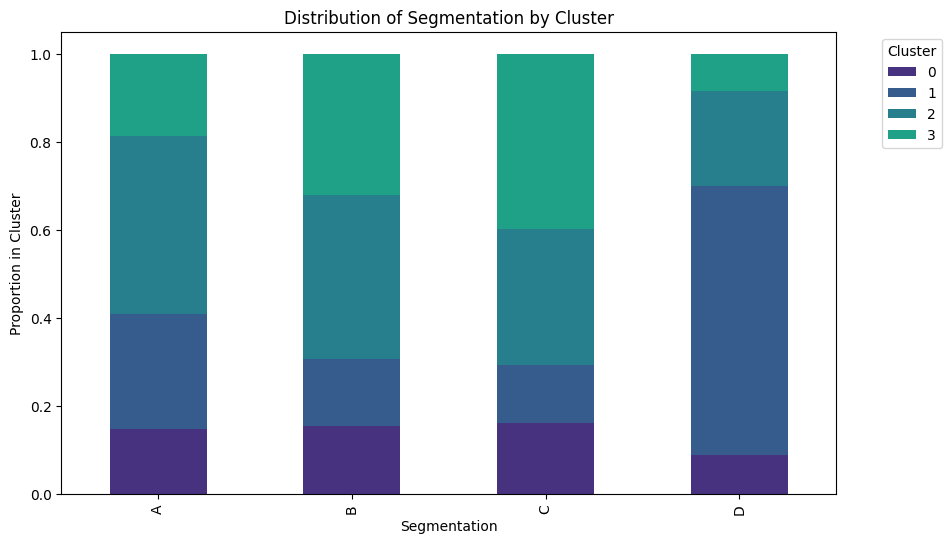

In [194]:
# Create a contingency table (crosstab) to count occurrences of each combination
contingency_table = pd.crosstab(merged_df_m1['Segmentation'], merged_df_m1['Cluster'])

# Normalize the table to display proportions instead of counts
normalized_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Plot the normalized contingency table as a stacked bar chart
normalized_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Segmentation')
plt.ylabel('Proportion in Cluster')
plt.title('Distribution of Segmentation by Cluster')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

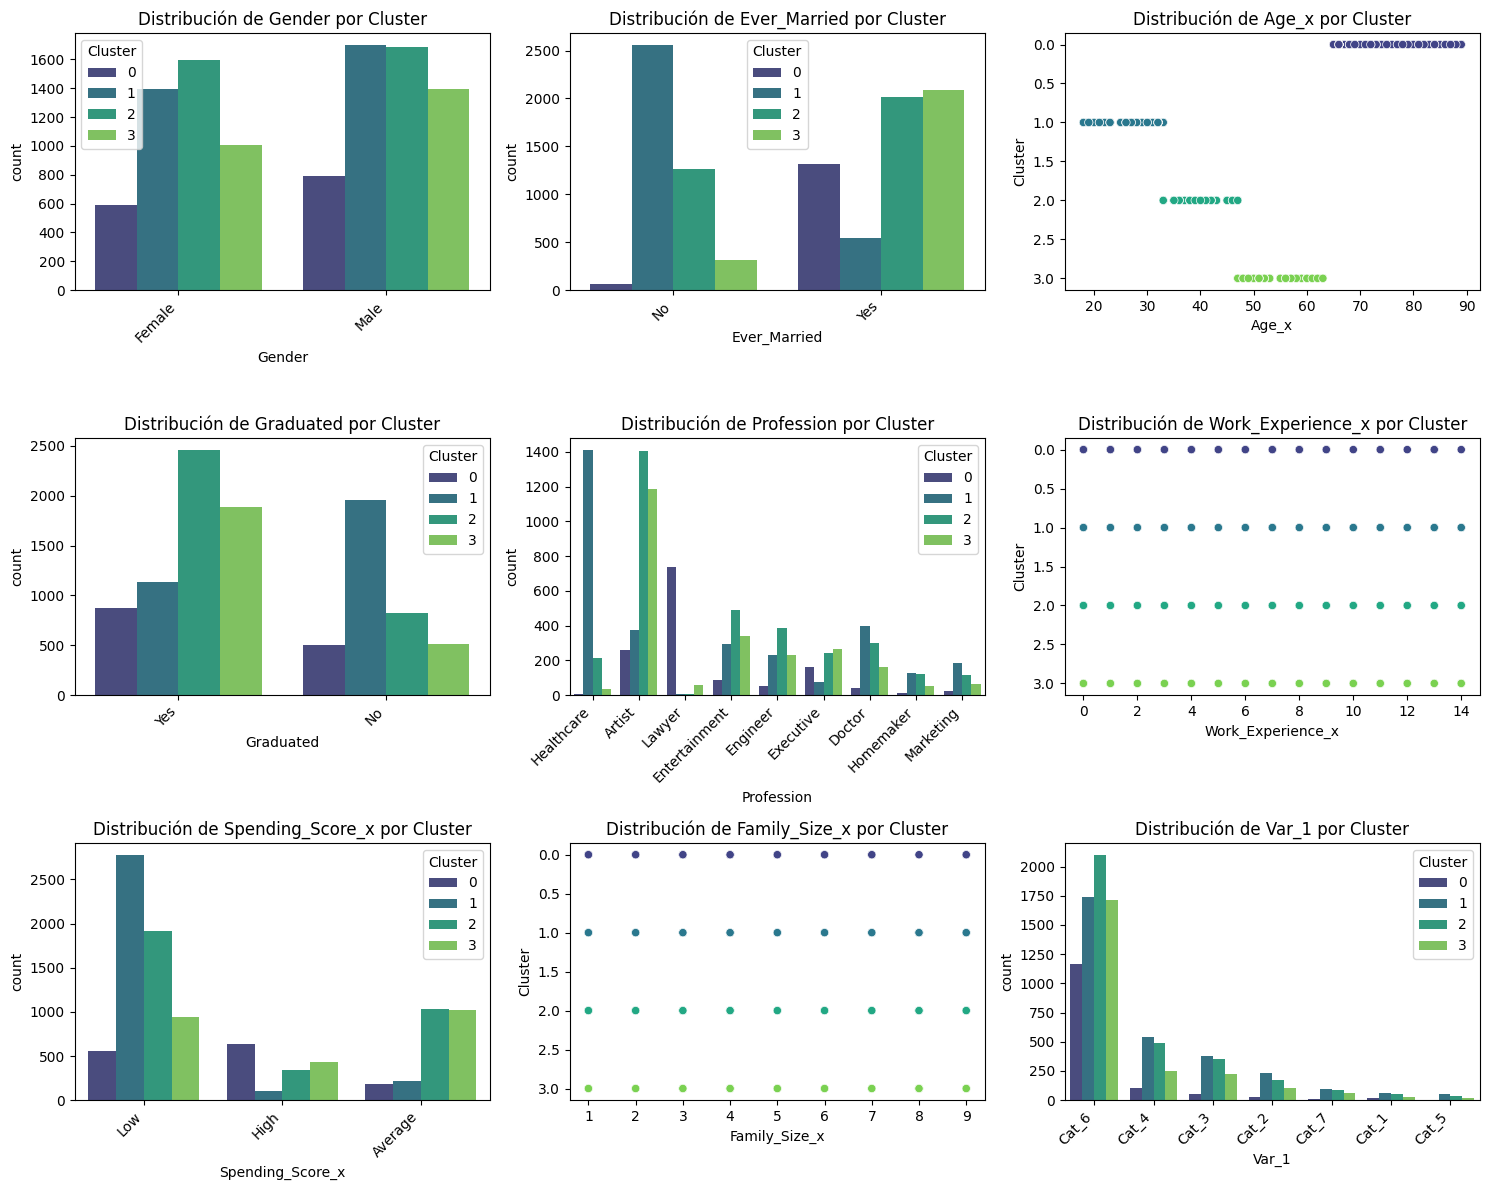

In [195]:
# Lista de campos a visualizar
fields_to_plot = ['Gender', 'Ever_Married', 'Age_x', 'Graduated', 'Profession', 'Work_Experience_x', 'Spending_Score_x', 'Family_Size_x', 'Var_1']

# Configurar el diseño de subtramas
num_plots = len(fields_to_plot)
num_rows = 3  # Cambiar según la cantidad de subtramas deseadas por fila
num_cols = (num_plots - 1) // num_rows + 1

# Crear la figura y las subtramas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

# Iterar a través de los campos y crear los gráficos correspondientes
for i, field in enumerate(fields_to_plot):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    if merged_df_m1[field].dtype == 'object':
        # Gráfico de barras para campos categóricos
        sns.countplot(data=merged_df_m1, x=field, hue='Cluster', ax=ax, palette='viridis')
        ax.set_title(f'Distribución de {field} por Cluster')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Inclinar x-labels
    else:
        # Gráfico de dispersión para campos numéricos
        sns.scatterplot(data=merged_df_m1, x=field, y='Cluster', hue='Cluster', ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {field} por Cluster')
        ax.set_ylabel('Cluster')
        ax.set_xlabel(field)

# Eliminar subtramas vacías si es necesario
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

# Ajustar el diseño de las subtramas
plt.tight_layout()
plt.show()

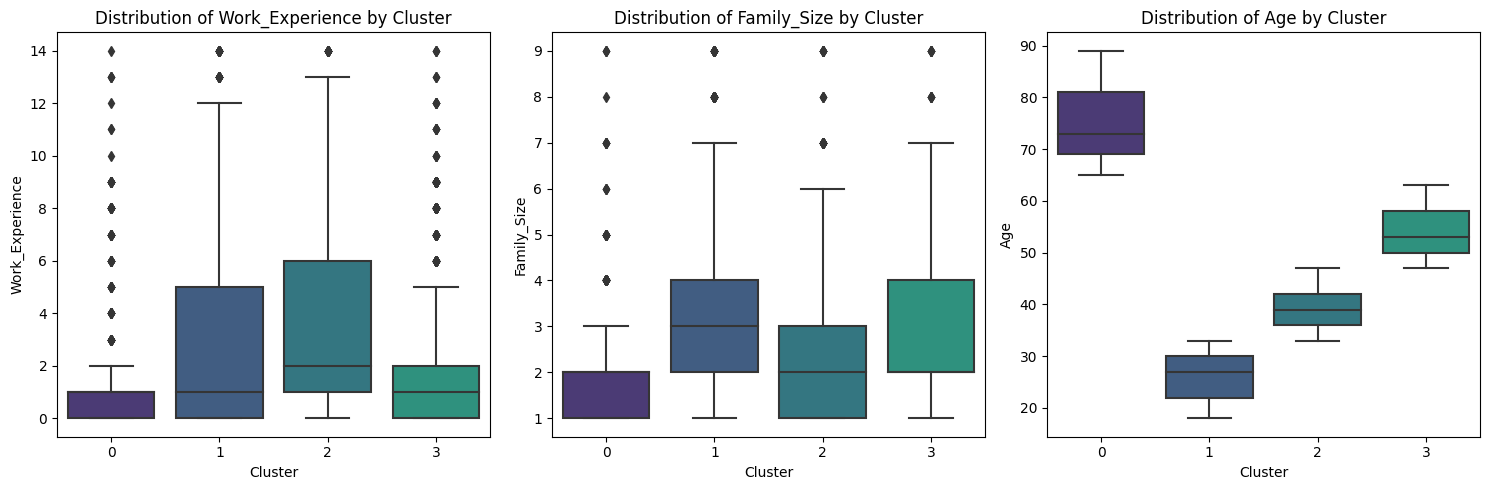

In [196]:
#--Boxplots for Continuous Variables.
# List of fields to plot
fields_to_plot = ['Work_Experience', 'Family_Size', 'Age']

# Create subplots
fig, axes = plt.subplots(1, len(fields_to_plot), figsize=(15, 5))

# Iterate through fields and create box plots
for i, field in enumerate(fields_to_plot):
    sns.boxplot(x='Cluster', y=field, data=df_adj, ax=axes[i])
    axes[i].set_title(f'Distribution of {field} by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()

The initial approach, which encompassed all the fields or characteristics present in the dataset, has yielded intriguing insights. Firstly, variables such as Profession, Age, and Graduated status exhibit noteworthy disparities in cluster distribution. However, the relationships within other variables, such as Gender, Var_1 and Work_Experience, remain less evident.

The Silhouette Coefficient, standing at 0.43, indicates an acceptable but not highly optimal clustering solution.

Building upon these preliminary findings, we will now explore the evaluation of three distinct scenarios:

* Scenario 1: Eliminating variables lacking discernible patterns.
* Scenario 2: Switching the number of clusters.
* Scenario 3: Applying Standard Scaling to continous variables (Age, Family Size, Work Experience).

These adjustments aim to refine the clustering results and enhance our understanding of the underlying data structure.

### Scenario 1

In [253]:
# Eliminar la columna 'Segmentation'
df_2 = df.drop(columns=['Gender','Var_1','Work_Experience','Family_Size','Segmentation'])

# Verificar el DataFrame resultante
df_2.head()

,Ever_Married,Age,Graduated,Profession,Spending_Score
0,No,32,Yes,Healthcare,Low
1,No,56,Yes,Artist,Low
2,Yes,75,No,Lawyer,Low
3,Yes,39,No,Entertainment,Low
4,No,22,No,Healthcare,Low


In [254]:
#--Create a function to save code lines

def encode_and_dummy(input_df, category_mapping, columns_to_encode):
    # Create a copy of the input DataFrame
    df_encoded = input_df.copy()

    # Create an encoder
    encoder = LabelEncoder()

    # Apply mapping to the specified columns
    for column, mapping in category_mapping.items():
        encoder.fit(list(mapping.keys()))
        df_encoded[column] = df_encoded[column].map(mapping)

    # Create dummy variables for the specified columns
    df_encoded = pd.get_dummies(df_encoded, columns=columns_to_encode, drop_first=True)

    return df_encoded

# Example of usage:
category_mapping = {
    'Spending_Score': {
        'Low': 0,
        'Average': 1,
        'High': 2
    }
}

columns_to_encode = ['Ever_Married', 'Graduated', 'Profession']

# Call the function with your DataFrame and specific parameters
df_2_adj = encode_and_dummy(df_2, category_mapping, columns_to_encode)
df_2_adj.head()

,Age,Spending_Score,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,32,0,0,1,0,0,0,0,1,0,0,0
1,56,0,0,1,0,0,0,0,0,0,0,0
2,75,0,1,0,0,0,0,0,0,0,1,0
3,39,0,1,0,0,0,1,0,0,0,0,0
4,22,0,0,0,0,0,0,0,1,0,0,0


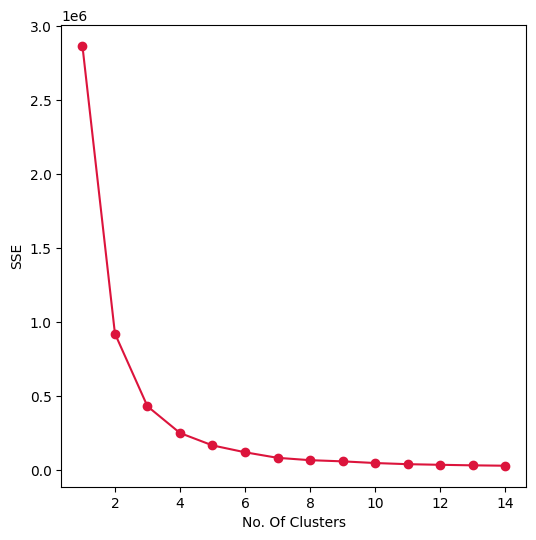

In [255]:
warnings.filterwarnings('ignore')  # Add this line to suppress warnings

SSE = []
for cluster in range(1, 15):
    model = KMeans(n_clusters=cluster, init='k-means++').fit(df_2_adj)
    SSE.append(model.inertia_)

frame = pd.DataFrame({'Cluster': range(1, 15), 'SSE': SSE})
plt.figure(figsize=(6, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', c='crimson')
plt.xlabel('No. Of Clusters')
plt.ylabel('SSE')

plt.show()

In [256]:
# K-mean Model Scenario 1
model_s1 = KMeans(n_clusters=4).fit(df_2_adj)
labels = model_s1.labels_

Text(0, 0.5, 'Counts')

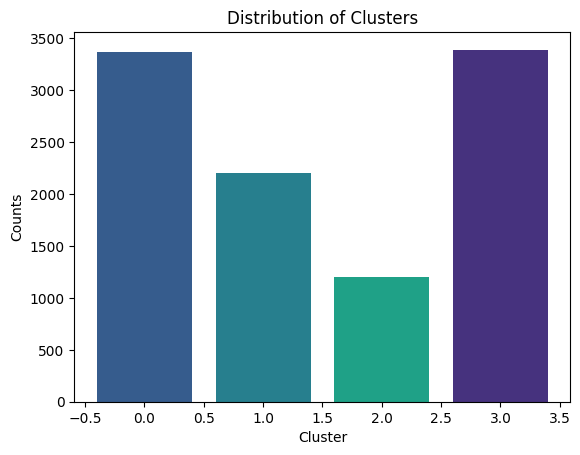

In [257]:
#Getting the value counts for the different clusters
pred = model_s1.predict(df_2_adj)
df_2_adj['Cluster'] = pred
plt.bar(df_2_adj['Cluster'].value_counts().index, df_2_adj['Cluster'].value_counts().values, color=sns.color_palette())
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Counts')

In [258]:
silhouette_avg_ms1 = silhouette_score(df_2_adj.drop(columns=['Cluster']), df_2_adj['Cluster'])
silhouette_avg_ms1

0.535592734851015

In [260]:
merged_df_ms1 = pd.merge(df, df_2_adj, left_index=True, right_index=True)
merged_df_ms1 = merged_df_ms1[['Gender', 'Ever_Married', 'Age_x', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score_x', 'Family_Size', 'Var_1', 'Segmentation', 'Cluster']]

# Convert 'Cluster' to a categorical variable
merged_df_ms1['Cluster'] = merged_df_ms1['Cluster'].astype('category')

merged_df_ms1

,Gender,Ever_Married,Age_x,Graduated,Profession,Work_Experience,Spending_Score_x,Family_Size,Var_1,Segmentation,Cluster
0,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D,0
1,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A,1
2,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D,2
3,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D,3
4,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D,0
...,...,...,...,...,...,...,...,...,...,...,...
10690,Female,No,30,Yes,Healthcare,8.0,Low,1.0,Cat_6,D,0
10691,Female,Yes,81,Yes,Lawyer,0.0,Average,2.0,Cat_6,A,2
10692,Female,No,40,Yes,Entertainment,14.0,Low,1.0,Cat_6,A,3
10693,Male,Yes,87,Yes,Lawyer,1.0,High,2.0,Cat_6,A,2


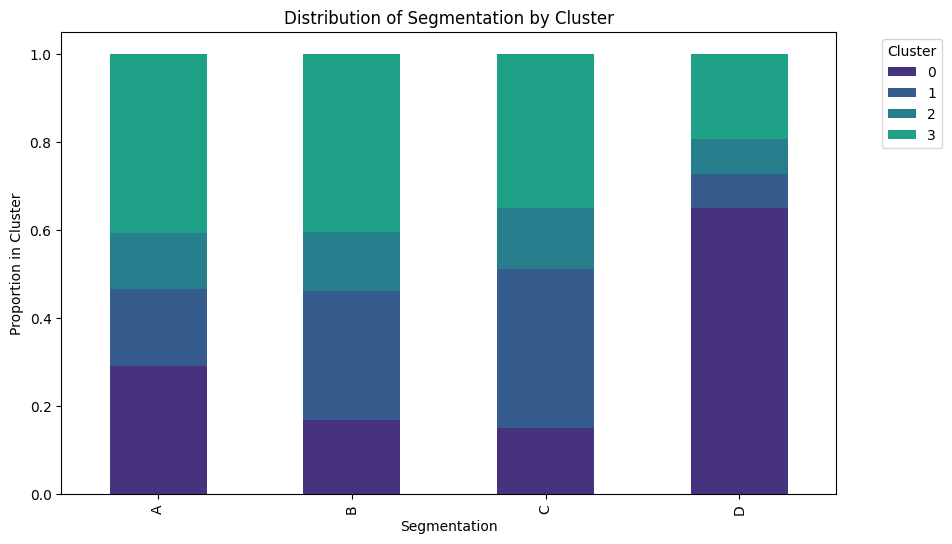

In [261]:
# Create a contingency table (crosstab) to count occurrences of each combination
contingency_table_ms1 = pd.crosstab(merged_df_ms1['Segmentation'], merged_df_ms1['Cluster'])

# Normalize the table to display proportions instead of counts
normalized_table_ms1 = contingency_table_ms1.div(contingency_table_ms1.sum(axis=1), axis=0)

# Plot the normalized contingency table as a stacked bar chart
normalized_table_ms1.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Segmentation')
plt.ylabel('Proportion in Cluster')
plt.title('Distribution of Segmentation by Cluster')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [265]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Extract true labels and cluster labels
true_labels = merged_df_ms1['Segmentation']
cluster_labels = merged_df_ms1['Cluster'].astype(str)  # Convert cluster labels to strings

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, cluster_labels)

# Calculate purity score
purity = np.sum(np.amax(conf_matrix, axis=0)) / np.sum(conf_matrix)

print(f"Purity Score for Model Scenario 1: {purity:.2f}")

Purity Score for Model Scenario 1: 0.41


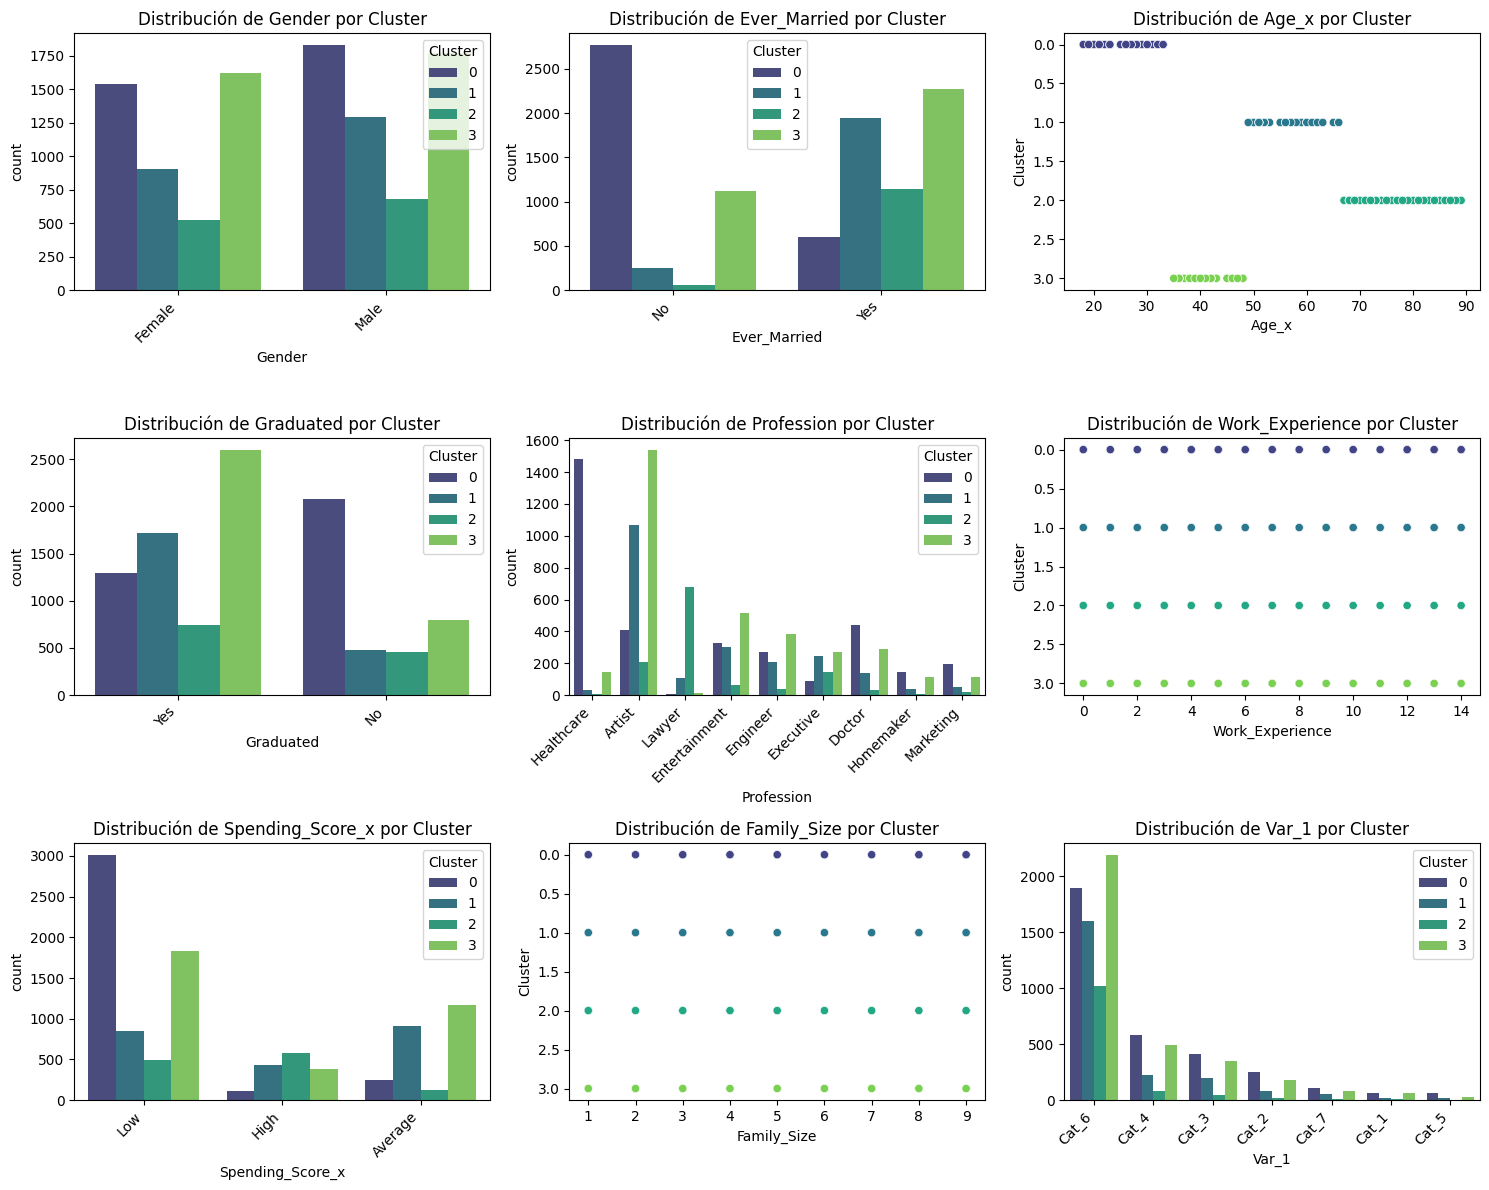

In [263]:
# Lista de campos a visualizar
fields_to_plot = ['Gender', 'Ever_Married', 'Age_x', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score_x', 'Family_Size', 'Var_1']

# Configurar el diseño de subtramas
num_plots = len(fields_to_plot)
num_rows = 3  # Cambiar según la cantidad de subtramas deseadas por fila
num_cols = (num_plots - 1) // num_rows + 1

# Crear la figura y las subtramas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

# Iterar a través de los campos y crear los gráficos correspondientes
for i, field in enumerate(fields_to_plot):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    if merged_df_ms1[field].dtype == 'object':
        # Gráfico de barras para campos categóricos
        sns.countplot(data=merged_df_ms1, x=field, hue='Cluster', ax=ax, palette='viridis')
        ax.set_title(f'Distribución de {field} por Cluster')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Inclinar x-labels
    else:
        # Gráfico de dispersión para campos numéricos
        sns.scatterplot(data=merged_df_ms1, x=field, y='Cluster', hue='Cluster', ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {field} por Cluster')
        ax.set_ylabel('Cluster')
        ax.set_xlabel(field)

# Eliminar subtramas vacías si es necesario
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

# Ajustar el diseño de las subtramas
plt.tight_layout()
plt.show()

### Scenario 2

In [240]:
# List of cluster numbers to try
cluster_numbers = [2, 3, 4, 5]

# Dictionary to store KMeans models and silhouette scores
results = {}

# Loop through each cluster number
for n_clusters in cluster_numbers:
    # Create a KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)

    # Fit the model to your data (replace 'df_2_adj' with your actual dataframe)
    kmeans.fit(df_2_adj)

    # Predict cluster labels for your data
    cluster_labels = kmeans.predict(df_2_adj)

    # Compute the silhouette score
    silhouette = silhouette_score(df_2_adj, cluster_labels)

    # Store the model and silhouette score in the results dictionary
    results[n_clusters] = {"model": kmeans, "silhouette_score": silhouette}

# Print silhouette scores for different cluster numbers
for n_clusters, result in results.items():
    print(f"Silhouette Score for {n_clusters} clusters: {result['silhouette_score']}")

Silhouette Score for 2 clusters: 0.5754843584391304
Silhouette Score for 3 clusters: 0.5282404485637301
Silhouette Score for 4 clusters: 0.5143386680479051
Silhouette Score for 5 clusters: 0.5048334027897172


### Scenario 3

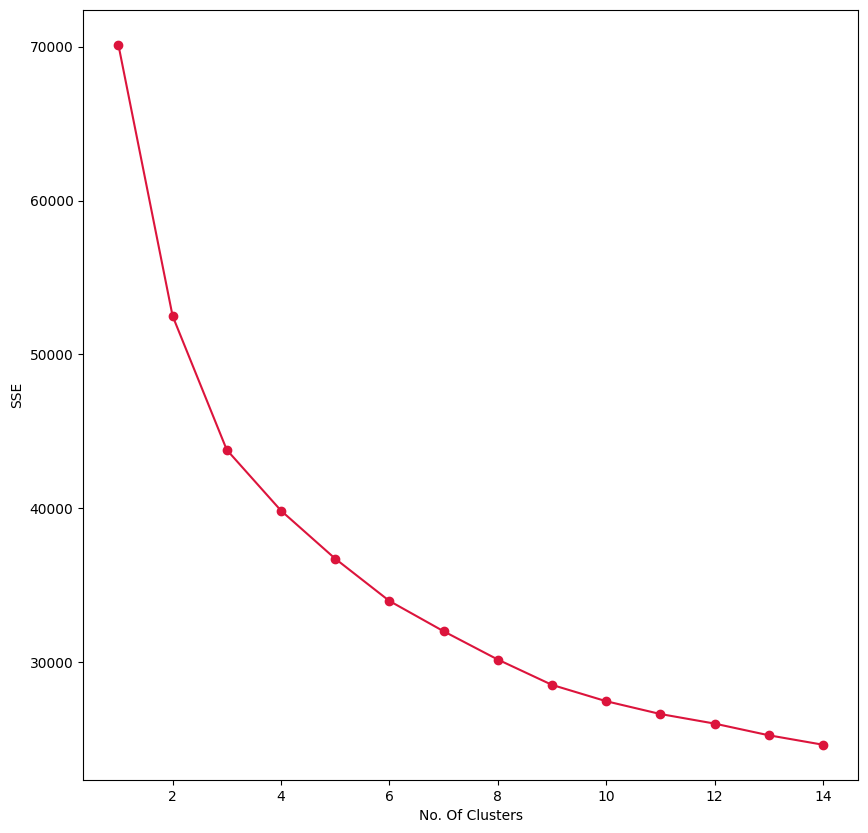

In [154]:
warnings.filterwarnings('ignore')  # Add this line to suppress warnings

#Plotting the Elbow Curve

SSE = []
for cluster in range(1, 15):
    model = KMeans(n_clusters=cluster, init='k-means++').fit(df_scaled)
    SSE.append(model.inertia_)


frame = pd.DataFrame({'Cluster': range(1, 15), 'SSE': SSE})
plt.figure(figsize=(10, 10))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', c='crimson')
plt.xlabel('No. Of Clusters')
plt.ylabel('SSE')

plt.show()

In [243]:
# K-mean Model Scenario 3 Keeping variables but applying Standard Scaling
model_s3 = KMeans(n_clusters=4).fit(df_scaled)
labels = model_s3.labels_

Text(0, 0.5, 'Counts')

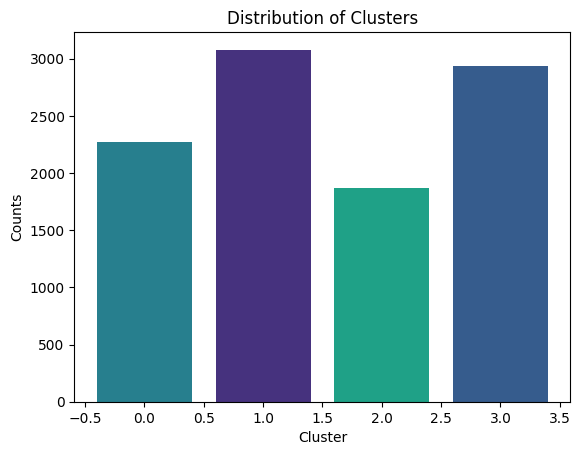

In [244]:
#Getting the value counts for the different clusters
pred = model_s3.predict(df_scaled)
df_scaled['Cluster'] = pred
plt.bar(df_scaled['Cluster'].value_counts().index, df_scaled['Cluster'].value_counts().values, color=sns.color_palette())
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Counts')

In [245]:
silhouette_avg_ms3 = silhouette_score(df_scaled.drop(columns=['Cluster']), df_scaled['Cluster'])
silhouette_avg_ms3

0.17560600260833745

In [246]:
merged_df_ms3 = pd.merge(df, df_scaled, left_index=True, right_index=True)
merged_df_ms3 = merged_df_ms3[['Gender', 'Ever_Married', 'Age_x', 'Graduated', 'Profession', 'Work_Experience_x', 'Spending_Score_x', 'Family_Size_x', 'Var_1', 'Segmentation', 'Cluster']]

# Convert 'Cluster' to a categorical variable
merged_df_ms3['Cluster'] = merged_df_ms3['Cluster'].astype('category')

merged_df_ms3

,Gender,Ever_Married,Age_x,Graduated,Profession,Work_Experience_x,Spending_Score_x,Family_Size_x,Var_1,Segmentation,Cluster
0,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D,2
1,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A,1
2,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D,3
3,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D,2
4,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D,2
...,...,...,...,...,...,...,...,...,...,...,...
10690,Female,No,30,Yes,Healthcare,8.0,Low,1.0,Cat_6,D,2
10691,Female,Yes,81,Yes,Lawyer,0.0,Average,2.0,Cat_6,A,3
10692,Female,No,40,Yes,Entertainment,14.0,Low,1.0,Cat_6,A,2
10693,Male,Yes,87,Yes,Lawyer,1.0,High,2.0,Cat_6,A,3


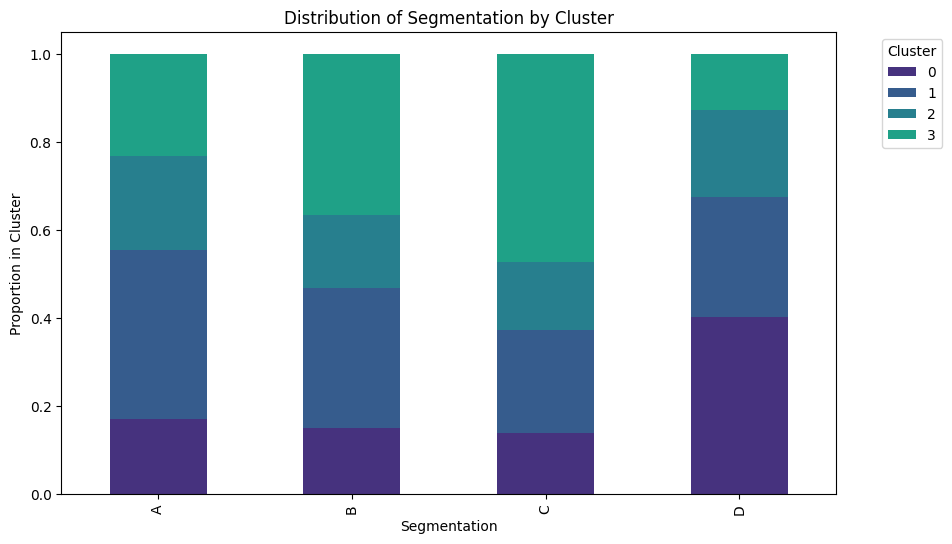

In [247]:
# Create a contingency table (crosstab) to count occurrences of each combination
contingency_table_ms3 = pd.crosstab(merged_df_ms3['Segmentation'], merged_df_ms3['Cluster'])

# Normalize the table to display proportions instead of counts
normalized_table_ms3 = contingency_table_ms3.div(contingency_table_ms3.sum(axis=1), axis=0)

# Plot the normalized contingency table as a stacked bar chart
normalized_table_ms3.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Segmentation')
plt.ylabel('Proportion in Cluster')
plt.title('Distribution of Segmentation by Cluster')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Conclusions

The conclusion from having a silhouette score of 0.54 and a purity score of 0.4 is that while the clusters show some degree of geometric separation (according to the silhouette score), they do not align well with the true class labels (as indicated by the purity score). Here are some considerations:

* ***Silhouette Score (0.54)***: This suggests that, from a geometric perspective, there is moderate separation and cohesion between data points within clusters. It indicates that the clustering algorithm has created clusters that are, on average, internally cohesive and well-separated from other clusters in terms of their geometric properties.

* ***Purity Score (0.41)***: This indicates that the clusters do not align well with the true class labels. Only 40% of the data points are correctly assigned to clusters based on class labels. This score suggests that the clustering may not accurately capture the underlying structure of the data in terms of class membership

## Next Steps

Based on the conclusion that the clustering model has a Silhouette Score of 0.54, indicating moderate geometric separation, but a Purity Score of 0.41, indicating poor alignment with true class labels, here are some next actions to improve the clustering model or customer segmentation:

* Feature Selection or Engineering: Review the features used in clustering. Consider whether there are additional relevant features that could improve the separation of clusters or better capture the underlying structure of the data. Feature selection or engineering may help enhance the performance of the model.

* Different Algorithms: Experiment with different clustering algorithms, such as DBSCAN, hierarchical clustering, or Gaussian Mixture Models (GMM). Different algorithms may capture different types of structures in the data, and one of them might perform better.

* Data Preprocessing: Ensure that your data is preprocessed appropriately. For this case it was only handling missing values, but we could also scaling features, and address outliers. Data preprocessing can have a significant impact on clustering results.

* Visual Inspection: Visualize the clusters and data distribution using dimensionality reduction techniques like PCA or t-SNE. Visual inspection can provide insights into the structure of the data and whether the chosen clustering method aligns with it.

* Ensemble Clustering: Explore ensemble clustering methods that combine multiple clustering algorithms to improve clustering quality. For example, you can use methods like Consensus Clustering or Cluster-Ensemble.

* Domain Knowledge: Leverage domain knowledge to guide the clustering process. Sometimes, domain-specific insights can help in selecting relevant features or understanding the meaning of clusters.

* Evaluate with Additional Metrics: Besides Silhouette Score and Purity Score, consider using other clustering evaluation metrics such as Adjusted Rand Index (ARI), Normalized Mutual Information (NMI), or Davies-Bouldin Index to get a more comprehensive assessment of cluster quality.

* Iterative Process: Clustering is often an iterative process. Experiment with different approaches, evaluate their results, and refine your model accordingly. It may take several iterations to achieve a satisfactory clustering solution.

* Feedback Loop: If the clustering results are intended for customer segmentation, consider gathering feedback from domain experts or stakeholders to validate the segments' interpretability and utility.

* Collect More Data: In some cases, collecting more data, especially if it's labeled data, can lead to better clustering results. Additional data can help the model learn more representative cluster patterns.

Remember that improving clustering results can be an iterative and exploratory process. It's essential to balance computational resources, domain knowledge, and the specific goals of your segmentation task when deciding on the next steps